# Práctica 3: La maldición de la dimensionalidad

Statistical Learning II

Eddson Sierra

In [36]:
import sklearn as sk
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

Extraemos las features del dataset de precios de casas: 

In [39]:
data = np.load(r"C:\Users\eddso\OneDrive\Maestría\Ciclo 1 - 2021\Ciencia de Datos en Python\Proyecto\proyecto_training_data.npy")
features = pd.DataFrame(data[:,1:6])
features = features.fillna(0)
features_df = features.rename(columns = {0: 'OverallQual', 1: '1stFlrSF', 2:'TotRmsAbvGrd', 3:'YearBuilt', 4:'LotFrontage'})
features_df.head()

,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,7.0,856.0,8.0,2003.0,65.0
1,6.0,1262.0,6.0,1976.0,80.0
2,7.0,920.0,6.0,2001.0,68.0
3,7.0,961.0,7.0,1915.0,60.0
4,8.0,1145.0,9.0,2000.0,84.0


In [139]:
def dimension(features, grado_max):

    una_variable = features[:,1].reshape(-1,1)
    dos_variables = features[:,1:3]
    tres_variables = features[:,1:4]
    features_lista = [una_variable, dos_variables,tres_variables]
    
    resultado = []
    
    for i in range(1,grado_max+1):
        poli = PolynomialFeatures(i)
        
        for j in range(0,len(features_lista)): 
            featuresPV = poli.fit_transform(features_lista[j])
            dimPV = featuresPV.shape[1]
            #resultado[i] = (features_lista[j].shape[1], dimPV)
            resultado.append((i, features_lista[j].shape[1], dimPV))
            
    return resultado


In [140]:
salida = np.array(dimension(data,grado_max = 3))
grado1 = salida[:3,:]
grado2 = salida[3:6,:]
grado3 = salida[6:,:]

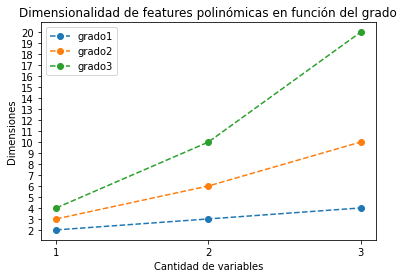

In [173]:
plt.plot(grado1[:,1], grado1[:,2], marker='o', linestyle='--', label = 'grado1')
plt.plot(grado2[:,1], grado2[:,2], marker='o', linestyle='--', label = 'grado2')
plt.plot(grado3[:,1], grado3[:,2], marker='o', linestyle='--', label = 'grado3')
plt.xticks(range(1,4))
plt.yticks(range(2,21))
plt.xlabel('Cantidad de variables')
plt.ylabel('Dimensiones')
plt.title('Dimensionalidad de features polinómicas en función del grado')
plt.legend()
plt.show()

**Breve análisis**

Como podemos observar en la gráfica, la cantidad de dimensiones (features polinómicas) incrementan exponencialmente a mayor cantidad de variables y grado del polinomio, lo que aumenta la complejidad y disminuye la habilidad de un modelo para generalizar los datos. Esto es lo que se conoce como *maldición de dimensionalidad*.

Por ejemplo, para un polinomio de grado 1 a partir de una sola variable se obtienen dos dimensiones, pero si se utiliza una sola variable con  un polinomio de grado 3, las features polinómicas aumentan a 4. Como puede observarse en la gráfica, la mientras mayor grado también se aumenta el riesgo de sobreajuste a los datos. La maldición de dimensionalidad es un obstáculo en el aprendizaje automático y también en la estadística bayesiana donde su principal efecto es causar que una distribución tenga demasiados parámetros. 